<a href="https://colab.research.google.com/github/Shailendra079/The-Sparks-Foundation-Tasks/blob/main/Indian_state_cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
sns.set()

In [ ]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
 from google.colab import files
uploaded = files.upload()

Saving poptable.csv to poptable (1).csv


In [ ]:
data = pd.read_csv('poptable.csv')
data.head()

,Unnamed: 0,State.Name,latitude,longitude
0,1,ANDAMAN AND NICOBAR,11.667026,92.735983
1,2,ANDHRA PRADESH,14.750429,78.570026
2,3,ARUNACHAL PRADESH,27.100399,93.616601
3,4,ASSAM,26.749981,94.216667
4,5,BIHAR,25.785414,87.479973


In [ ]:
data.columns

Index(['Unnamed: 0', 'State.Name', 'latitude', 'longitude'], dtype='object')

In [ ]:
df = data.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.head()

,State.Name,latitude,longitude
0,ANDAMAN AND NICOBAR,11.667026,92.735983
1,ANDHRA PRADESH,14.750429,78.570026
2,ARUNACHAL PRADESH,27.100399,93.616601
3,ASSAM,26.749981,94.216667
4,BIHAR,25.785414,87.479973


In [ ]:
df.describe()

,latitude,longitude
count,33.000000,33.000000
mean,22.654234,82.200225
std,6.894189,7.581593
min,8.900373,72.636867
25%,19.250232,76.569993
50%,23.835404,78.570026
75%,27.333330,88.616647
max,34.299959,94.216667


In [ ]:
df.isnull().sum()

State.Name    0
latitude      0
longitude     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  33 non-null     int64  
 1   State.Name  33 non-null     object 
 2   latitude    33 non-null     float64
 3   longitude   33 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


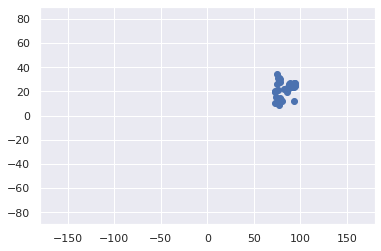

In [ ]:
plt.scatter(df['longitude'],df['latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [ ]:
X=df.iloc[:,1:3]
X

,latitude,longitude
0,11.667026,92.735983
1,14.750429,78.570026
2,27.100399,93.616601
3,26.749981,94.216667
4,25.785414,87.479973
5,30.719997,76.780006
6,22.090420,82.159987
7,20.266578,73.016618
8,28.669993,77.230004
9,15.491997,73.818001


In [ ]:
Kmeans=KMeans(4)
Kmeans.fit(X)

KMeans(n_clusters=4)

In [ ]:
identified_clusters=Kmeans.fit_predict(X)
identified_clusters

array([0, 2, 1, 1, 1, 3, 0, 2, 3, 2, 3, 3, 3, 0, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 0, 2, 3, 3, 1, 2, 1, 3, 3, 0], dtype=int32)

In [ ]:
data_with_clusters=df.copy()
data_with_clusters['cluster'] = identified_clusters
data_with_clusters

,State.Name,latitude,longitude,cluster
0,ANDAMAN AND NICOBAR,11.667026,92.735983,0
1,ANDHRA PRADESH,14.750429,78.570026,2
2,ARUNACHAL PRADESH,27.100399,93.616601,1
3,ASSAM,26.749981,94.216667,1
4,BIHAR,25.785414,87.479973,1
5,CHANDIGARH,30.719997,76.780006,3
6,CHHATTISGARH,22.090420,82.159987,0
7,DADRA AND NAGAR HAVELI,20.266578,73.016618,2
8,DELHI,28.669993,77.230004,3
9,GOA,15.491997,73.818001,2


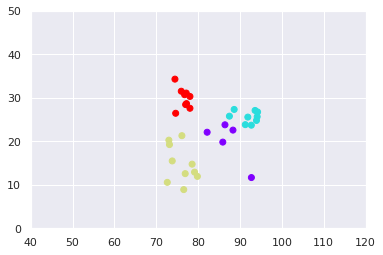

In [ ]:
plt.scatter(data_with_clusters['longitude'],data_with_clusters['latitude'],c=data_with_clusters['cluster'],cmap='rainbow')
plt.xlim(40,120)
plt.ylim(0,50)
plt.show()